In [1]:
!pip install tensorflow

<ipython-input-7-e683d87145f6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].astype(str)


Record:  Humanity's growing footprint hasn't been kind to the planet - or our own future. Can intelligent #DigitalPower reshape our relationship with #energy & lead us into a green & abundant #IntelligentWorld2030? Learn more. https://tinyurl.com/y4tf4t72 #HuaweiBlog
Label:  2021-12-23T10:29:22+0000
{'with': 939, 'other': 617, 'threats': 838, 'on': 607, 'the': 822, 'rise': 717, 'digital': 238, 'trust': 866, 'is': 454, 'must': 567, 'in': 424, 'an': 57, 'world': 947, 'learn': 488, 'about': 25, 'tech': 807, 'that': 821, 'will': 936, 'step': 769, 'up': 880, 'to': 847, 'keep': 469, 'your': 965, 'data': 214, 'as': 77, 'https': 407, 'tinyurl': 843, 'com': 164, 'first': 314, 'of': 602, 'huawei': 408, 'online': 609, 'why': 933, 'we': 920, 'need': 577, 'way': 919, 'technology': 810, 'see': 732, 'full': 332, 'here': 390, 'huaweifacts': 409, 'into': 447, 'new': 583, 'year': 959, 'same': 726, 'partners': 633, 'local': 507, 'are': 72, 'protecting': 677, 'biodiversity': 105, 'one': 608, 'smart': 749,

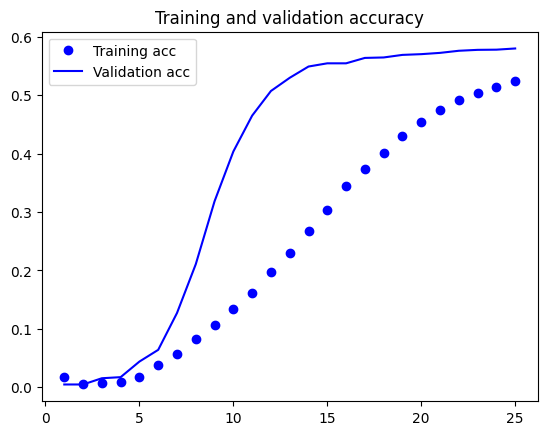

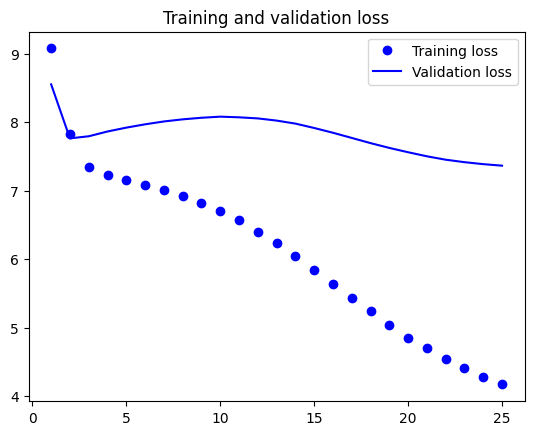

200/200 [==============================] - 2s 9ms/step - loss: 7.3646 - accuracy: 0.5801
Test loss: 7.364581108093262
Test accuracy: 0.5801035761833191


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_excel('/content/Huwavie data 2021_2022.xlsx')

# Drop rows with NaN values
df = df.dropna(subset=['message', 'created_time'])

# Convert 'message' column to string type
df['message'] = df['message'].astype(str)

x = df['message'].values
y = df['created_time'].values

print("Record: ", x[22])
print("Label: ", y[22])

# Convert text data to TF-IDF representations
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(x).toarray()

# Get the vocabulary
dic = vectorizer.vocabulary_
print(dic)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Convert the labels to categorical format
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Create the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
